In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/MyDrive/Bigdata/Project")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import, Clean and Join

In [ ]:
demographic_data = pd.read_excel("whole_data/whole_data/original/Demography_USA.xlsx")
pharma_data = pd.read_excel("whole_data/whole_data/original/Modified_pharmacies_data.xlsx")

In [ ]:
unwanted_words = ['borough', 'city and borough', 'municipality','census area','county', 'city']
pharma_data['county'] = pharma_data['county'].str.lower()
pharma_data['State'] = pharma_data['State'].str.lower()
demographic_data['County Name'] = demographic_data['County Name'].str.lower()
demographic_data['STATE_NAME'] = demographic_data['STATE_NAME'].str.lower()
pharma_data["county"] = pharma_data["county"].replace(dict(zip(unwanted_words,['']*len(unwanted_words))),regex=True)

In [ ]:
pharma_data['county'] = pharma_data['county'].str.strip()
pharma_data['State'] = pharma_data['State'].str.strip()
print(pharma_data.shape)
print(pharma_data.columns)
print(demographic_data.shape)
print(demographic_data.columns)

(21496, 7)
Index(['State', 'Pharmacy Name', 'Street Address 1 (physical store address)',
       'Street Address 2 ', 'City', 'Zip', 'county'],
      dtype='object')
(3219, 73)
Index(['OBJECTID', 'NAME', 'STATE_NAME', 'Prevalence of obesity', 'Asthma',
       'Hypertension', 'Diabetes', 'CVD', 'COPD', 'Kidney disease', 'Cancer',
       'HIV/AIDS', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'POP2010', 'POP10_SQMI',
       'POP2013', 'POP13_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS12',
       'AVE_SIZE

# Analysis on Merge data

In [ ]:
 merge_data_del = pd.merge(left=pharma_data, right=demographic_data, left_on=['county', 'State'], right_on=['County Name', 'STATE_NAME'], how = 'left')
 print(merge_data_del.shape)
 print('')
 print('Missing values after join by each state')
 missing_joins = merge_data_del[merge_data_del['County Name'].isnull()][['county','State_x', 'County Name', 'STATE_NAME']].drop_duplicates().groupby('State_x')['county'].count()
 del1 = merge_data_del.groupby('State_x')['county'].count()
 del1 = pd.concat([missing_joins, del1], axis = 1)
 del1.columns = ['miss count', 'overall count']
 del1['%miss'] = del1['miss count']/del1['overall count']*100
 del1

(21496, 80)

Missing values after join by each state


,miss count,overall count,%miss
State_x,,,
alaska,6.0,126,4.761905
arkansas,1.0,750,0.133333
california,0.0,6531,0.000000
maine,1.0,538,0.185874
massachusetts,0.0,1098,0.000000
north carolina,232.0,3507,6.615341
oregon,197.0,1374,14.337700
texas,3.0,5379,0.055772
idaho,NaN,281,NaN


In [ ]:
merge_data_del[merge_data_del['County Name'].isnull()]

,State_x,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,county,OBJECTID,NAME,STATE_NAME,...,Shape__Area,Shape__Length,State_y,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k
70,alaska,INLET PHARMACY,1313 EAST MAPLE STREET SUITE 682,NaN,BELLINGHAM,98225,whatcom,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,alaska,SEARHC JUNEAU MEDICAL CENTER PHARMACY,3100 CHANNEL DR. STE 300,NaN,JUNEAU,99801,juneau and,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,alaska,BARTLETT REGIONAL HOSPITAL PHARMACY,3260 HOSPITAL DR,NaN,JUNEAU,99801,juneau and,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,alaska,FOODLAND PHARMACY,615 W. WILLOUGHBY AVE,NaN,JUNEAU,99801,juneau and,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,alaska,COSTCO PHARMACY #107,5225 COMMERCIAL BLVD,NaN,JUNEAU,99801,juneau and,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19196,arkansas,"Forrest City Family Pharmacy, LLC",2307 North Washington Street,NaN,Forrest City,72335,saint francis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19403,arkansas,Palestine Family Pharmacy,"411 Main Street, Suite A",NaN,Palestine,72372,saint francis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19419,arkansas,"PHPh, LLC",313 Arkansas Street,NaN,Forrest City,72336,saint francis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19603,arkansas,Walgreen Co.,2110 N. Washington St.,NaN,Forrest City,72335,saint francis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
#### From the above table, we can observe more than 4% of values are missing from alaska, north carolina, oregon. For now, we will be excluding the values which has miss % more than 1

In [ ]:
merge_data_del2 = pd.merge(left=pharma_data, right=demographic_data, left_on=['county', 'State'], right_on=['County Name', 'STATE_NAME'], how = 'inner')
merge_data_del2[['county','State_x', 'Pharmacy Name', 'Street Address 1 (physical store address)', 'Zip']].groupby(['county','State_x', 'Pharmacy Name', 'Street Address 1 (physical store address)'])['county'].count().sort_values()

county                State_x     Pharmacy Name                                Street Address 1 (physical store address)
ada                   idaho       ALBERTSONS LLC dba ALBERTSONS PHARMACY #199  1219 S Broadway Ave                          1
phelps                missouri    Mercy Pharmacy St. James                     105 W. Eldon                                 1
                                  Phelps Health                                1000 W. 10th Street                          1
                                  Phelps Health Employee Pharmacy              1050 West 10th St.                           1
                                  Sinks Pharmacy                               1375 B East 10th Street                      1
                                                                                                                           ..
harris                texas       R.C.S. (RESPIRATORY CARE SVCS)               LLC                                         

### Observation
#### Only last 3 values of the whole data have multiple entries for the same pharmacy and address. In total, there are 4 additional values which are negligible compared to whole.

# Data Merge and Observations based on correlation values

In [ ]:
# merge_data = pd.merge(left=pharma_summary_data, right=demographic_data, on='FIPS', how = 'inner')
# merge_data.rename({'Pharmacy_count':'count_pharma'},axis=1, inplace=True)

In [ ]:
pharma_data_group = pharma_data.groupby(['State', 'county'], as_index = False)['Pharmacy Name'].count().rename({'Pharmacy Name' : 'count_pharma'}, axis = 1)
merge_data1 = pd.merge(left=pharma_data_group, right=demographic_data, left_on=['county', 'State'], right_on=['County Name', 'STATE_NAME'], how = 'inner')
merge_data = merge_data1[~merge_data1['State_x'].isin(['north carolina', 'oregon', 'alaska'])]

In [ ]:
corr_with_pharma = merge_data.corr().reset_index()[['index', 'count_pharma']]
states_list = list(set(merge_data.STATE_NAME))
for s in states_list:
  df_corr = merge_data[merge_data.STATE_NAME == s].corr(numeric_only=True).reset_index()[['index', 'count_pharma']].rename({'count_pharma' : s}, axis = 1)
  corr_with_pharma = pd.concat([corr_with_pharma, df_corr.drop('index', axis=1)],axis=1)
corr_with_pharma.set_index('index', inplace=True)
corr_with_pharma.index

<ipython-input-11-35fb67364d85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_pharma = merge_data.corr().reset_index()[['index', 'count_pharma']]


Index(['count_pharma', 'OBJECTID', 'Prevalence of obesity', 'Asthma',
       'Hypertension', 'Diabetes', 'CVD', 'COPD', 'Kidney disease', 'Cancer',
       'HIV/AIDS', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'POP2010', 'POP10_SQMI',
       'POP2013', 'POP13_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS12',
       'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12', 'SQMI', 'Shape__Area',
       'Shape__Length', 'IECC Climate Zone', 'Temp', 'cvd_100k',
       'hypertension_100k'],
      dtype='object', name='inde

In [ ]:
merge_data.to_csv('merge.csv')

<Axes: ylabel='index'>

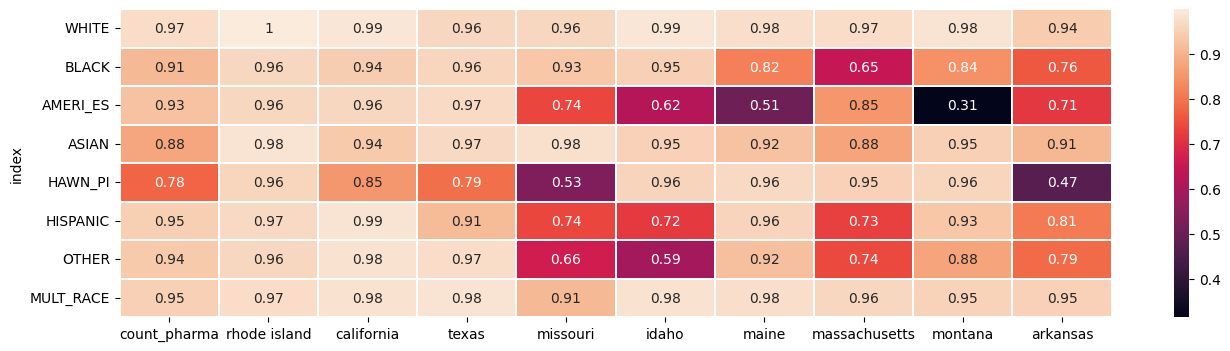

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corr_with_pharma.loc[['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE']], annot=True, linewidths=0.3)

### Observation(based on race)

1.   No descrimination observed in Rhode islands
2.   People of race Ameri_es are not considered in maine and montana

1.   Only Hawn_pi race is downsided in texas and california
2.   Most descrimination is observed in arkansas and missouri






<Axes: ylabel='index'>

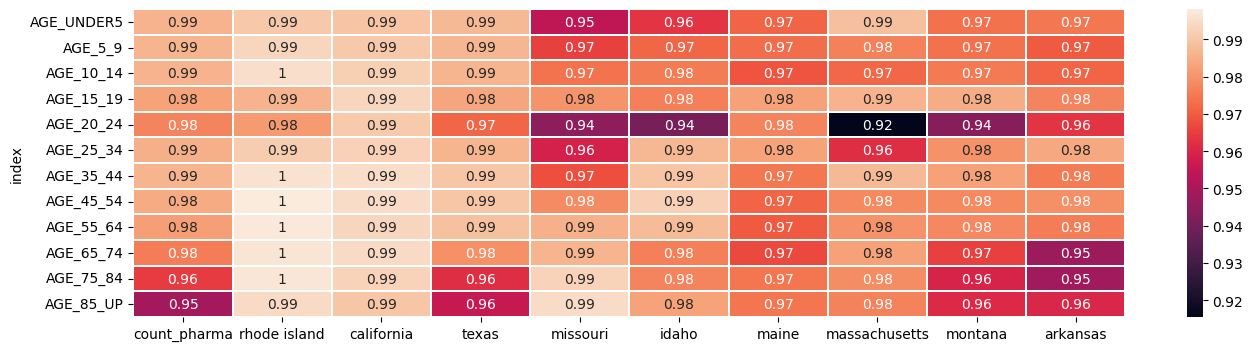

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corr_with_pharma.loc[['AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP']], annot=True, linewidths=0.3)

## Observation(Based on Age)



*   No major descrimination based on age is observed





<Axes: ylabel='index'>

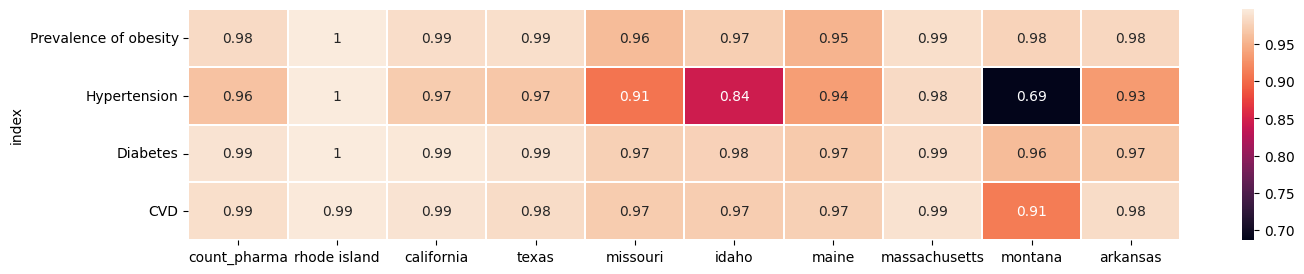

In [ ]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.heatmap(corr_with_pharma.loc[['Prevalence of obesity', 'Hypertension', 'Diabetes', 'CVD']], annot=True, linewidths=0.3) # 'Asthma', , 'COPD', 'Kidney disease'

## Observation(Based on Disease)

*   No adequate pharmacies present for people with hypertension in states montana, idaho, missouri





<Axes: ylabel='index'>

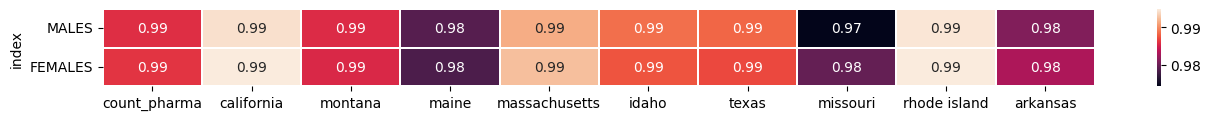

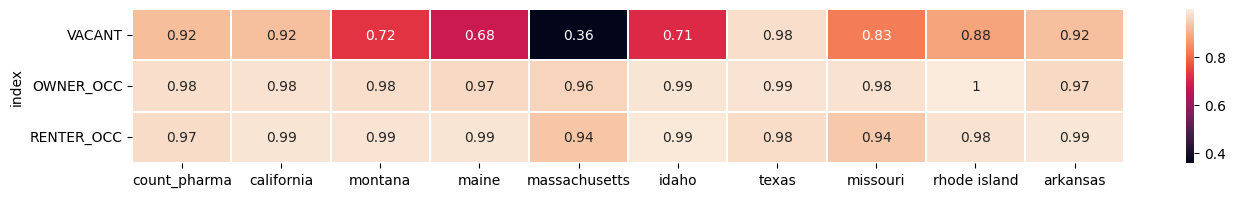

In [ ]:
fig, ax = plt.subplots(figsize=(16, 1))
sns.heatmap(corr_with_pharma.loc[['MALES', 'FEMALES']], annot=True, linewidths=0.3)
fig, ax = plt.subplots(figsize=(16, 2))
sns.heatmap(corr_with_pharma.loc[['VACANT', 'OWNER_OCC', 'RENTER_OCC']], annot=True, linewidths=0.3)

## Observation (Gender, Owner/Renter)

*   No descrimination based on Gender

*   No pharmacies near vacant houses like maine, montana, massachusetts, idaho



<Axes: ylabel='index'>

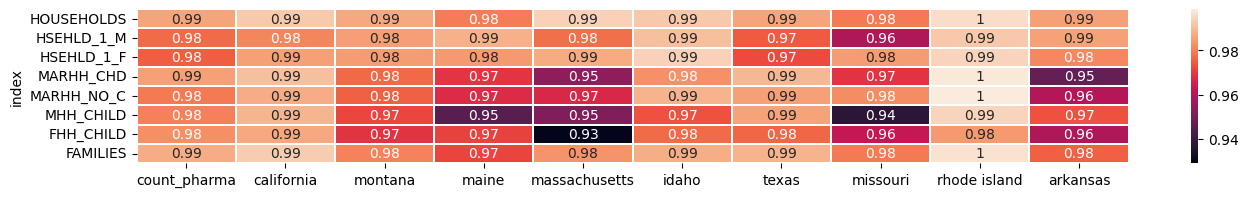

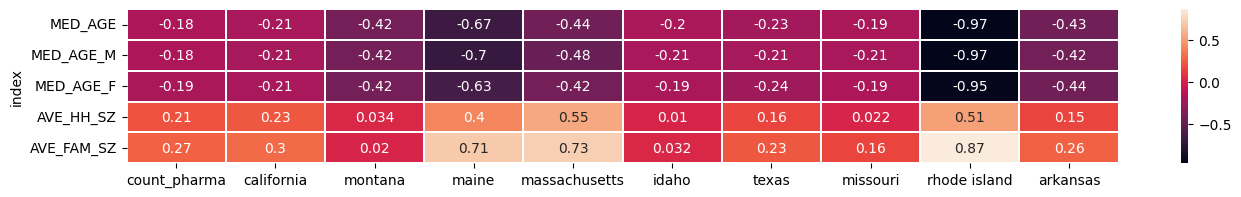

In [ ]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.heatmap(corr_with_pharma.loc[['HOUSEHOLDS',  'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES']], annot=True, linewidths=0.3)
fig, ax = plt.subplots(figsize=(16, 2))
sns.heatmap(corr_with_pharma.loc[['MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'AVE_HH_SZ', 'AVE_FAM_SZ']], annot=True, linewidths=0.3)

## Observations (Family related columns and aggregated columns)

*   Not Effected by any column






<Axes: ylabel='index'>

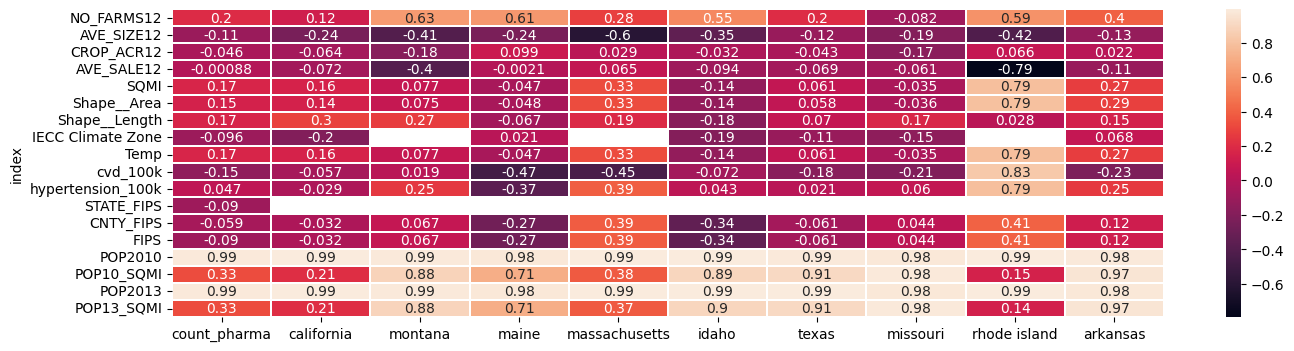

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corr_with_pharma.loc[['NO_FARMS12','AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12', 'SQMI', 'Shape__Area',
       'Shape__Length', 'IECC Climate Zone', 'Temp', 'cvd_100k','hypertension_100k', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'POP2010', 'POP10_SQMI',
       'POP2013', 'POP13_SQMI']], annot=True, linewidths=0.3)

## Observations(All other columns)

*   Pharmacies are not placed in popultion dense places in states massachusetts, rhode islands and california
*   Rhode islands have correlation with most of the columns compared to other countries


#Analysis based on Percentage

In [ ]:
list1 = ['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE' ,'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
         'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP' ,'Prevalence of obesity', 'Asthma', 'Hypertension', 'Diabetes', 'CVD', 'COPD',
         'Kidney disease' ,'MALES', 'FEMALES' ,'VACANT', 'OWNER_OCC', 'RENTER_OCC']

for col in list1:
  merge_data[col+"_percent"] = merge_data[col]/ merge_data['POP2010']

<ipython-input-19-95509a2fdfe3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data[col+"_percent"] = merge_data[col]/ merge_data['POP2010']
<ipython-input-19-95509a2fdfe3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data[col+"_percent"] = merge_data[col]/ merge_data['POP2010']
<ipython-input-19-95509a2fdfe3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
corr_with_pharma = merge_data[[col+"_percent" for col in list1]+['count_pharma']].corr().reset_index()[['index', 'count_pharma']]
states_list = list(set(merge_data.State_x))
for s in states_list:
  df_corr = merge_data.loc[merge_data.State_x == s,[col+"_percent" for col in list1]+['count_pharma']].corr(numeric_only=True).reset_index()[['index', 'count_pharma']].rename({'count_pharma' : s}, axis = 1)
  corr_with_pharma = pd.concat([corr_with_pharma, df_corr.drop('index', axis=1)],axis=1)
corr_with_pharma.set_index('index', inplace=True)
corr_with_pharma.index

Index(['WHITE_percent', 'BLACK_percent', 'AMERI_ES_percent', 'ASIAN_percent',
       'HAWN_PI_percent', 'HISPANIC_percent', 'OTHER_percent',
       'MULT_RACE_percent', 'AGE_UNDER5_percent', 'AGE_5_9_percent',
       'AGE_10_14_percent', 'AGE_15_19_percent', 'AGE_20_24_percent',
       'AGE_25_34_percent', 'AGE_35_44_percent', 'AGE_45_54_percent',
       'AGE_55_64_percent', 'AGE_65_74_percent', 'AGE_75_84_percent',
       'AGE_85_UP_percent', 'Prevalence of obesity_percent', 'Asthma_percent',
       'Hypertension_percent', 'Diabetes_percent', 'CVD_percent',
       'COPD_percent', 'Kidney disease_percent', 'MALES_percent',
       'FEMALES_percent', 'VACANT_percent', 'OWNER_OCC_percent',
       'RENTER_OCC_percent', 'count_pharma'],
      dtype='object', name='index')

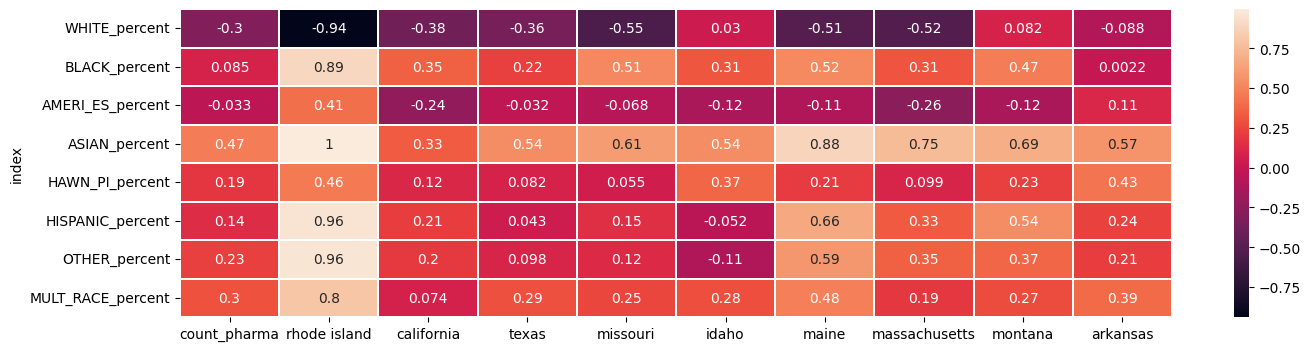

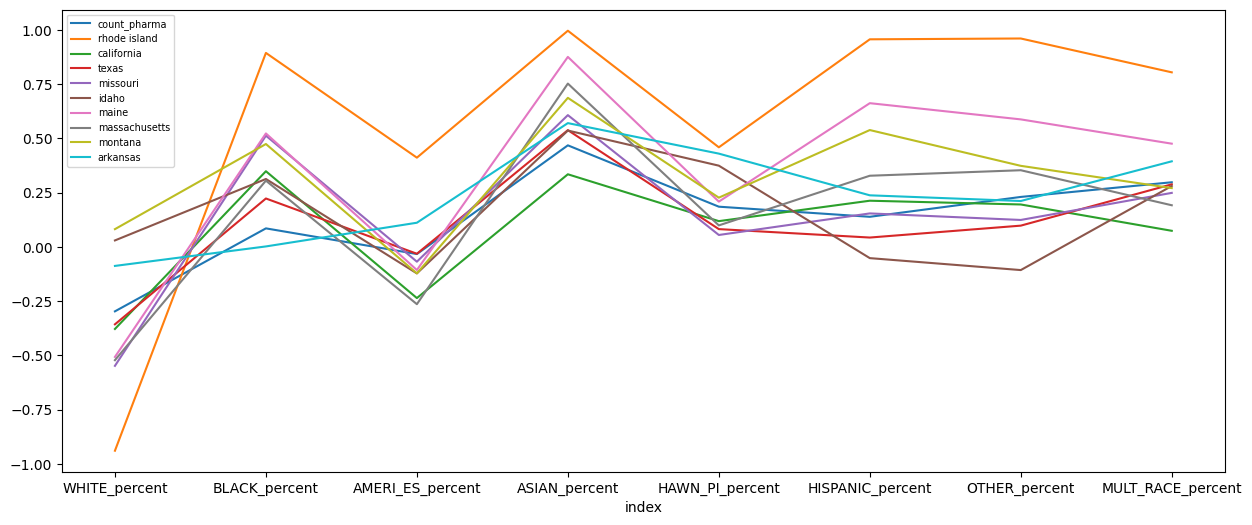

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corr_with_pharma.loc[[col+"_percent" for col in ['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE']]], annot=True, linewidths=0.3)
corr_with_pharma.loc[[col+"_percent" for col in ['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE']]].plot(figsize=(15,6))
plt.legend(loc=2, fontsize = 'x-small')

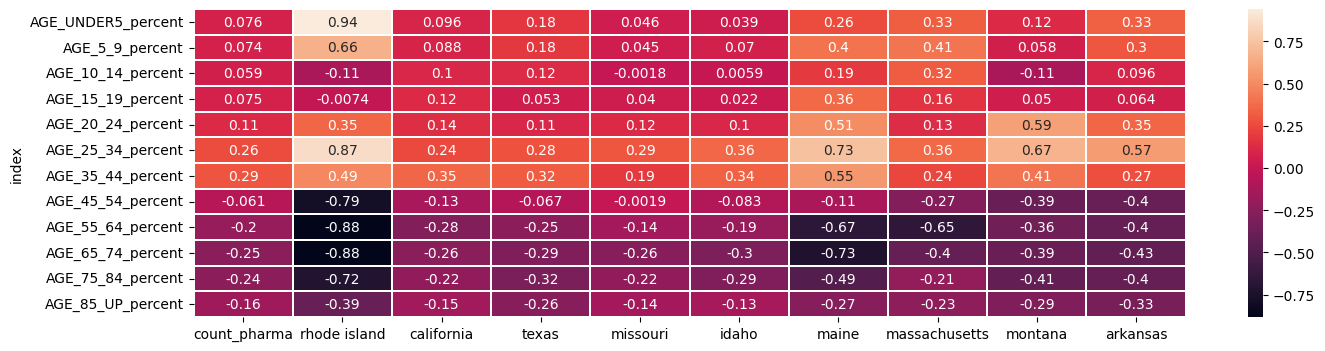

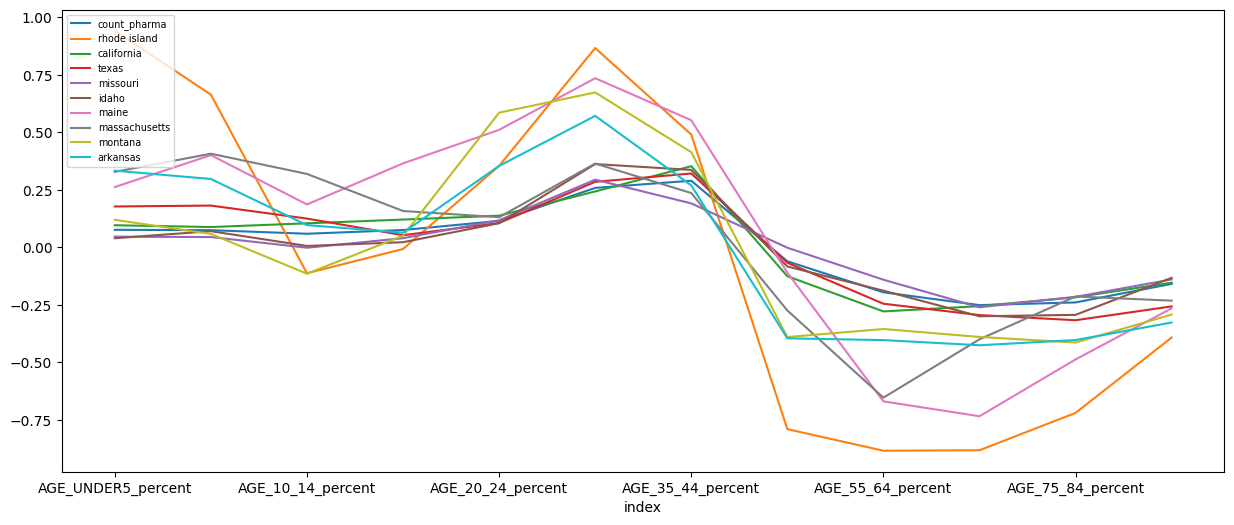

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corr_with_pharma.loc[[col+"_percent" for col in ['AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP']]], annot=True, linewidths=0.3)
corr_with_pharma.loc[[col+"_percent" for col in ['AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP']]].plot(figsize=(15,6))
plt.legend(loc=2, fontsize = 'x-small')

<Axes: ylabel='index'>

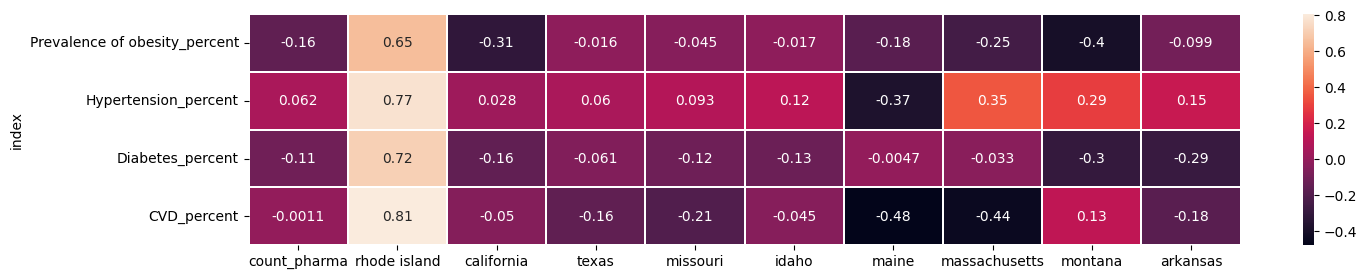

In [ ]:
fig, ax = plt.subplots(figsize=(16, 3))
sns.heatmap(corr_with_pharma.loc[[col+"_percent" for col in ['Prevalence of obesity', 'Hypertension', 'Diabetes', 'CVD']]], annot=True, linewidths=0.3) # 'Asthma', , 'COPD', 'Kidney disease'

<Axes: ylabel='index'>

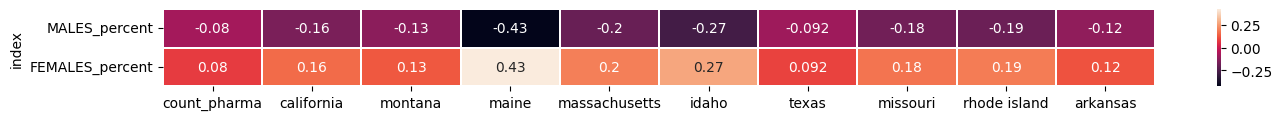

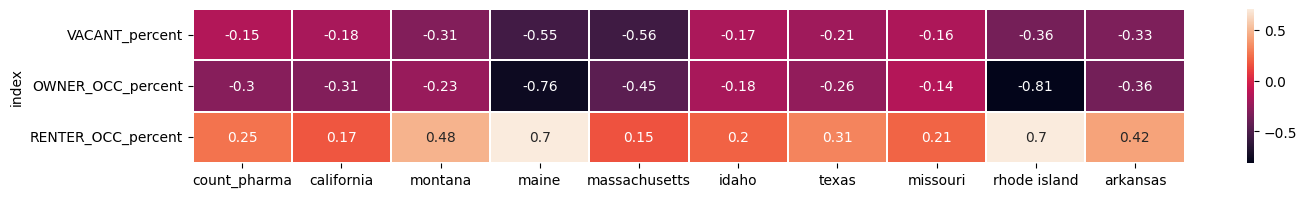

In [ ]:
fig, ax = plt.subplots(figsize=(16, 1))
sns.heatmap(corr_with_pharma.loc[[col+"_percent" for col in ['MALES', 'FEMALES']]], annot=True, linewidths=0.3)
fig, ax = plt.subplots(figsize=(16, 2))
sns.heatmap(corr_with_pharma.loc[[col+"_percent" for col in ['VACANT', 'OWNER_OCC', 'RENTER_OCC']]], annot=True, linewidths=0.3)

# Preprocessing

In [ ]:
print(merge_data.shape)
print()
print(merge_data.dtypes)
print()
merge_data.describe().T

(585, 108)

State_x                object
county                 object
count_pharma            int64
OBJECTID                int64
NAME                   object
                       ...   
MALES_percent         float64
FEMALES_percent       float64
VACANT_percent        float64
OWNER_OCC_percent     float64
RENTER_OCC_percent    float64
Length: 108, dtype: object



,count,mean,std,min,25%,50%,75%,max
count_pharma,585.0,28.064957,108.052447,1.000000,2.000000,5.000000,15.000000,1.921000e+03
OBJECTID,585.0,2027.892308,753.780475,100.000000,1455.000000,2090.000000,2677.000000,3.196000e+03
Prevalence of obesity,585.0,29559.584615,99073.942610,272.000000,2517.000000,5572.000000,16473.000000,1.653819e+06
Asthma,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hypertension,585.0,173.646783,698.302344,-99.000000,11.167702,27.504654,81.942176,1.137712e+04
...,...,...,...,...,...,...,...,...
MALES_percent,585.0,0.501727,0.024336,0.447581,0.490358,0.495688,0.504744,6.833863e-01
FEMALES_percent,585.0,0.498273,0.024336,0.316614,0.495256,0.504312,0.509642,5.524186e-01
VACANT_percent,585.0,0.088277,0.080707,0.015556,0.042152,0.064403,0.109191,7.499493e-01
OWNER_OCC_percent,585.0,0.272347,0.044056,0.136376,0.246244,0.276929,0.303470,3.705003e-01


In [ ]:
corr_with_pharma = merge_data.corr().reset_index()[['index', 'count_pharma']]
states_list = list(set(merge_data.State_x))
for s in states_list:
  df_corr = merge_data[merge_data.State_x == s].corr(numeric_only=True).reset_index()[['index', 'count_pharma']].rename({'count_pharma' : s}, axis = 1)
  corr_with_pharma = pd.concat([corr_with_pharma, df_corr.drop('index', axis=1)],axis=1)
corr_with_pharma.set_index('index', inplace=True)
corr_with_pharma.index

<ipython-input-26-eb83ae666672>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_pharma = merge_data.corr().reset_index()[['index', 'count_pharma']]


Index(['count_pharma', 'OBJECTID', 'Prevalence of obesity', 'Asthma',
       'Hypertension', 'Diabetes', 'CVD', 'COPD', 'Kidney disease', 'Cancer',
       'HIV/AIDS', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'POP2010', 'POP10_SQMI',
       'POP2013', 'POP13_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN',
       'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES',
       'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24',
       'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74',
       'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F',
       'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD',
       'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ',
       'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS12',
       'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12', 'SQMI', 'Shape__Area',
       'Shape__Length', 'IECC Climate Zone', 'Temp', 'cvd_100k',
       'hypertension_100k', 'WHITE_percent', 'BLACK_percent',

In [ ]:
print("Total colummns : " + str(corr_with_pharma.shape[0]))
print("After removing categorical columns : " + str(corr_with_pharma['count_pharma'].dropna().shape[0]))
print("After removing columns which have correlation with categorical column between (-0.1, 0.1) : " + str(corr_with_pharma[abs(corr_with_pharma['count_pharma'])>0.1].dropna().shape[0]))

Total colummns : 100
After removing categorical columns : 93
After removing columns which have correlation with categorical column between (-0.1, 0.1) : 74


In [ ]:
drop_columns = list(corr_with_pharma[abs(corr_with_pharma['count_pharma'])>0.1].dropna().index)
new_preprocess_data = merge_data[drop_columns]
print(new_preprocess_data.shape)

(585, 74)


## Traintest split, Model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_preprocess_data.drop('count_pharma', axis=1), new_preprocess_data['count_pharma'], test_size=0.2, random_state=42)

In [ ]:
def adj_r2():
  return 1 - ((1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def model_results(X_train, y_train, X_test, y_test):
  models = {'Linear Regression' : LinearRegression(), 'Elastic Regression' : ElasticNet(), 'Bayesian Ridge Regression' : BayesianRidge(),
          'XGB Regressor' : XGBRegressor(), 'GradientBoosting Regressor' : GradientBoostingRegressor(), 'DecisionTree Regressor' : DecisionTreeRegressor(max_depth = 5)}
  df_results = pd.DataFrame(columns = ['R_square', 'Adj_R_square', 'MAE', 'MSE'])
  for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
      df_preds = pd.concat([df_preds, pd.DataFrame({'pred '+ key : y_pred})], axis=1)
    except:
      df_preds = pd.DataFrame({'pred '+ key : y_pred})
    df_results = pd.concat([df_results, pd.DataFrame({'R_square' : r2_score(y_test, y_pred),
                                                      'Adj_R_square' : 1 - ((1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
                                                      'MSE' : mean_squared_error(y_test , y_pred), 'MAE' : mean_absolute_error(y_test , y_pred)},
                                                      index = [key])], axis=0)
  df_preds['ensemble1'] = (df_preds['pred Linear Regression'] + df_preds['pred Elastic Regression'] + df_preds['pred Bayesian Ridge Regression'])/3
  y_pred = df_preds['ensemble1']
  df_results = pd.concat([df_results, pd.DataFrame({'R_square' : r2_score(y_test, y_pred),
                                                      'Adj_R_square' : 1 - ((1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
                                                      'MSE' : mean_squared_error(y_test , y_pred), 'MAE' : mean_absolute_error(y_test , y_pred)},
                                                      index = ['ensemble1'])], axis=0)
  return df_results, df_preds

In [ ]:
df_results, df_preds = model_results(X_train, y_train, X_test, y_test)
display(df_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+04, tolerance: 5.440e+02
  model = cd_fast.enet_coordinate_descent(


,R_square,Adj_R_square,MAE,MSE
Linear Regression,0.968969,0.916288,6.581508,365.540754
Elastic Regression,0.979224,0.943954,6.603184,244.733399
Bayesian Ridge Regression,0.970019,0.919120,6.360988,353.175413
XGB Regressor,0.929795,0.810609,6.965388,827.005395
GradientBoosting Regressor,0.921720,0.788826,7.662687,922.122981
DecisionTree Regressor,0.732547,0.278498,12.556635,3150.545051
ensemble1,0.973956,0.929741,6.300932,306.794919


## PCA & Model

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[9.91010462e-01 5.62732875e-03 1.87719687e-03 9.07342073e-04
 2.26693317e-04 1.84130185e-04]
0.9998331529908187


In [ ]:
df_results, df_preds = model_results(X_train_pca, y_train, X_test_pca, y_test)
display(df_results)

,R_square,Adj_R_square,MAE,MSE
Linear Regression,0.955760,0.953347,6.356801,521.132163
Elastic Regression,0.955760,0.953347,6.356806,521.135034
Bayesian Ridge Regression,0.955736,0.953322,6.357651,521.420587
XGB Regressor,0.858226,0.850493,9.160023,1670.063537
GradientBoosting Regressor,0.648111,0.628917,12.382686,4145.173458
DecisionTree Regressor,-0.629027,-0.717883,21.985722,19189.599278
ensemble1,0.955752,0.953339,6.357086,521.229250


#Testing on 'north carolina', 'oregon', 'alaska'

In [ ]:
other_data = merge_data1[(merge_data1['STATE_NAME'] == 'north carolina') | (merge_data1['STATE_NAME'] == 'oregon') | (merge_data1['STATE_NAME'] == 'alaska')]
list1 = ['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE' ,'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
         'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP' ,'Prevalence of obesity', 'Asthma', 'Hypertension', 'Diabetes', 'CVD', 'COPD',
         'Kidney disease' ,'MALES', 'FEMALES' ,'VACANT', 'OWNER_OCC', 'RENTER_OCC']

for col in list1:
  other_data[col+"_percent"] = other_data[col]/ other_data['POP2010']

other_data = other_data[drop_columns+['STATE_NAME', 'county']]

<ipython-input-35-942446178cc9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data[col+"_percent"] = other_data[col]/ other_data['POP2010']
<ipython-input-35-942446178cc9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data[col+"_percent"] = other_data[col]/ other_data['POP2010']
<ipython-input-35-942446178cc9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
for i in ['north carolina', 'oregon', 'alaska']:
  print("Model Accuracies of " + i)
  other_data2 = other_data[other_data['STATE_NAME'] == i]
  X_other = other_data2.drop(['count_pharma', 'STATE_NAME', 'county'], axis = 1)
  y_other = other_data2['count_pharma']
  X_other_pca = pca.transform(X_other)
  df_results, df_preds = model_results(X_train_pca, y_train, X_other_pca, y_other)
  display(df_results)
  print()

Model Accuracies of north carolina


,R_square,Adj_R_square,MAE,MSE
Linear Regression,0.896862,0.890207,6.825349,167.273897
Elastic Regression,0.896861,0.890207,6.825355,167.274375
Bayesian Ridge Regression,0.896817,0.890160,6.826582,167.346298
XGB Regressor,0.920047,0.914889,6.224197,129.670359
GradientBoosting Regressor,0.911014,0.905273,6.525548,144.320108
DecisionTree Regressor,0.925403,0.920591,6.822559,120.983571
ensemble1,0.896847,0.890191,6.825762,167.298184



Model Accuracies of oregon


,R_square,Adj_R_square,MAE,MSE
Linear Regression,0.974257,0.968536,3.393562,25.337884
Elastic Regression,0.974257,0.968536,3.393552,25.337893
Bayesian Ridge Regression,0.974252,0.968531,3.393316,25.342311
XGB Regressor,0.953384,0.943024,3.876601,45.882329
GradientBoosting Regressor,0.939790,0.926410,4.174811,59.261573
DecisionTree Regressor,0.908396,0.888039,5.558887,90.161998
ensemble1,0.974255,0.968534,3.393477,25.339362



Model Accuracies of alaska


,R_square,Adj_R_square,MAE,MSE
Linear Regression,0.907347,0.837857,2.417024,14.946352
Elastic Regression,0.907347,0.837857,2.417025,14.946365
Bayesian Ridge Regression,0.907343,0.837850,2.417059,14.947039
XGB Regressor,0.703650,0.481388,3.937437,47.805801
GradientBoosting Regressor,0.749483,0.561595,3.743602,40.412347
DecisionTree Regressor,0.756316,0.573554,4.104834,39.309948
ensemble1,0.907346,0.837855,2.417036,14.946585


In [ ]:
import plotly.express as px
for i in ['north carolina', 'oregon', 'alaska']:
  other_data2 = other_data[other_data['STATE_NAME'] == i]
  X_other = other_data2.drop(['count_pharma', 'STATE_NAME','county'], axis = 1)
  y_other = other_data2['count_pharma']
  X_other_pca = pca.transform(X_other)
  model = LinearRegression()
  model.fit(X_train_pca, y_train)
  y_pred = model.predict(X_other_pca)
  df_out = pd.DataFrame({'County' : other_data2['county'], 'Additional pharmacies needed' : list(y_pred - y_other), 'x_points' : [i for i in range(len(y_other))]})
  fig = px.scatter(df_out, x="x_points", y="Additional pharmacies needed", text="County", log_x=True, size_max=100, color="Additional pharmacies needed")
  fig.update_traces(textposition='top center')
  fig.update_layout(title_text='Pharmacies needed in Each county : '+i, title_x=0.5)
  fig.show()